In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import math

In [2]:
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs,init_notebook_mode,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
vaccine_data = pd.read_csv('COVID-19 India Statewise Vaccine Data.csv')
vaccine_data

,State/UTs,Dose 1,Dose 2,Total Vaccination Doses
0,Andaman and Nicobar,215077,94272,309349
1,Andhra Pradesh,17533276,6167861,23701137
2,Arunachal Pradesh,689352,183631,872983
3,Assam,10262204,2161640,12423844
4,Bihar,23190928,4447714,27638642
5,Chandigarh,690815,220658,911473
6,Chhattisgarh,9960587,2597535,12558122
7,Dadra and Nagar Haveli and Daman and Diu,581393,79477,660870
8,Delhi,7750023,2940832,10690855
9,Goa,1089647,298023,1387670


In [20]:
fig = px.bar(vaccine_data,x='Total Vaccination Doses',y='State/UTs',color='State/UTs',
            title='Total Vaccination Doses Statewise',text='Total Vaccination Doses',width = 1000 ,height = 650)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig

# Top 10 States in India according to Total Vaccination Doses

In [5]:
vaccine_data.sort_values('Total Vaccination Doses',ascending=False).iloc[:10]

,State/UTs,Dose 1,Dose 2,Total Vaccination Doses
33,Uttar Pradesh,45211784,8396910,53608694
20,Maharashtra,34789942,11968889,46758831
10,Gujarat,27638343,8961874,36600217
28,Rajasthan,26798140,8286045,35084185
19,Madhya Pradesh,29251677,5649657,34901334
15,Karnataka,25591995,7335688,32927683
35,West Bengal,23018390,9081172,32099562
4,Bihar,23190928,4447714,27638642
30,Tamil Nadu,20642170,4642265,25284435
1,Andhra Pradesh,17533276,6167861,23701137


# Top 10 States in India according to Dose 1

In [6]:
vaccine_data.sort_values('Dose 1',ascending=False).iloc[:10]

,State/UTs,Dose 1,Dose 2,Total Vaccination Doses
33,Uttar Pradesh,45211784,8396910,53608694
20,Maharashtra,34789942,11968889,46758831
19,Madhya Pradesh,29251677,5649657,34901334
10,Gujarat,27638343,8961874,36600217
28,Rajasthan,26798140,8286045,35084185
15,Karnataka,25591995,7335688,32927683
4,Bihar,23190928,4447714,27638642
35,West Bengal,23018390,9081172,32099562
30,Tamil Nadu,20642170,4642265,25284435
1,Andhra Pradesh,17533276,6167861,23701137


# Top 10 States in India according to Dose 2

In [7]:
vaccine_data.sort_values('Dose 2',ascending=False).iloc[:10]

,State/UTs,Dose 1,Dose 2,Total Vaccination Doses
20,Maharashtra,34789942,11968889,46758831
35,West Bengal,23018390,9081172,32099562
10,Gujarat,27638343,8961874,36600217
33,Uttar Pradesh,45211784,8396910,53608694
28,Rajasthan,26798140,8286045,35084185
15,Karnataka,25591995,7335688,32927683
16,Kerala,15472773,6370804,21843577
1,Andhra Pradesh,17533276,6167861,23701137
19,Madhya Pradesh,29251677,5649657,34901334
30,Tamil Nadu,20642170,4642265,25284435


In [8]:
vaccine_data_copy = vaccine_data.copy()

In [9]:
vaccine_data_copy = vaccine_data_copy.set_index('State/UTs')

# Performance of Dose 1 & Dose 2 Statewise

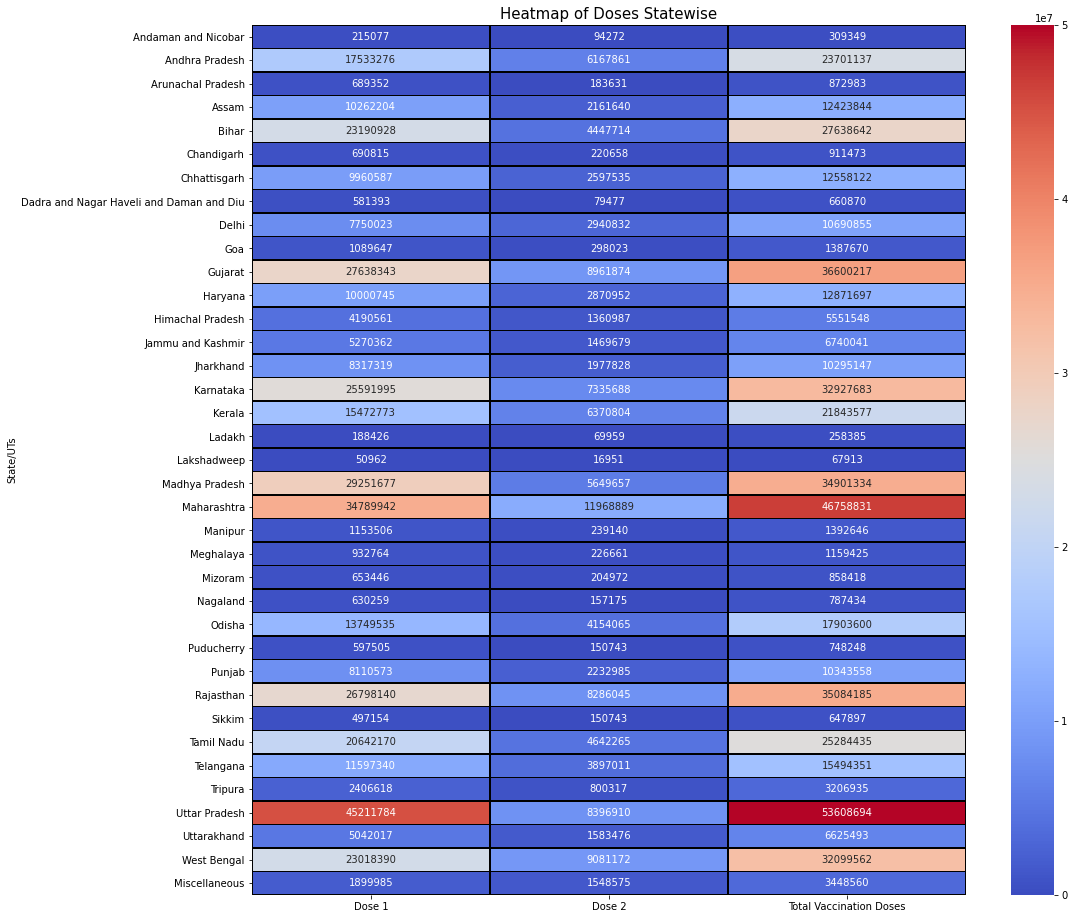

In [60]:
plt.figure(figsize=(16,16))
sns.heatmap(vaccine_data_copy,cmap='coolwarm',vmin=0,vmax=50000000,annot=True, fmt='d',linewidths=.5,linecolor='k')
plt.title('Heatmap of Doses Statewise',fontsize=15)
plt.show()

In [70]:
px.pie(vaccine_data,values='Dose 1',names='State/UTs',
      title='Dose 1 Statewise')

In [71]:
px.pie(vaccine_data,values='Dose 2',names='State/UTs',
      title='Dose 2 Statewise')

# Percentage of Doses in comparision of whole country

In [62]:
india_total_population = 1394938788

In [83]:
dose1_vaccination = vaccine_data['Dose 1'].sum()
dose1_vaccination

395667593

In [84]:
dose2_vaccination = vaccine_data['Dose 2'].sum()
dose2_vaccination

112997166

In [64]:
total_vaccination = vaccine_data['Total Vaccination Doses'].sum()
total_vaccination

508664759

In [88]:
percentage_of_dose1_vaccination = dose1_vaccination/india_total_population * 100
percentage_of_dose1_vaccination = str(round(percentage_of_dose1_vaccination,2))

percentage_of_dose2_vaccination = dose2_vaccination/india_total_population * 100
percentage_of_dose2_vaccination = str(round(percentage_of_dose2_vaccination,2))

percentage_of_total_vaccination = total_vaccination/india_total_population * 100
percentage_of_total_vaccination = str(round(percentage_of_total_vaccination,2))

print('Percentage of Dose 1 Vaccination in India: ',percentage_of_dose1_vaccination,'%')
print('Percentage of Dose 2 Vaccination in India: ',percentage_of_dose2_vaccination,'%')
print('Percentage of Total Vaccination in India: ',percentage_of_total_vaccination,'%')

Percentage of Dose 1 Vaccination in India:  28.36 %
Percentage of Dose 2 Vaccination in India:  8.1 %
Percentage of Total Vaccination in India:  36.47 %


# End